### Recognizing hand_written

In [2]:
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

### Digits dataset

The digits dataset consists of 8x8 pixel images of digits.
The images attribute of the dataset stores 8x8 arrays of grayscale values for each image. 
We will use these arrays to visualize the first 4 images. 
The target attribute of the dataset stores the digit each image represents and this is included in the title of the 4 plots below.



In [3]:
digits = datasets.load_digits()
print(dir(digits))


['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


In [4]:
print(digits.feature_names)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


AxesImage(54,36;334.8x217.44)


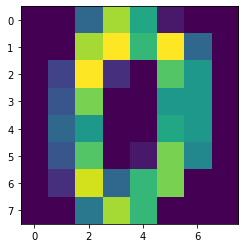

In [5]:
print(plt.imshow(digits.images[0]))

In [6]:
print(type(digits.frame))

<class 'NoneType'>


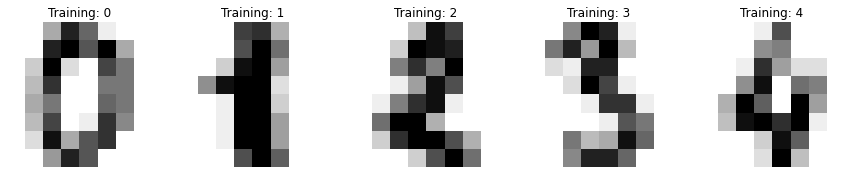

In [7]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 10))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [8]:
digits = datasets.load_digits()
digits.images[1].shape

(8, 8)

### Classification

To apply a classifier on this data, we need to flatten the images, turning each 2-D array of grayscale values from shape (8, 8) into shape (64,). Subsequently, the entire dataset will be of shape (n_samples, n_features), where n_samples is the number of images and n_features is the total number of pixels in each image.

We can then split the data into train and test subsets and fit a support vector classifier on the train samples. The fitted classifier can subsequently be used to predict the value of the digit for the samples in the test subset

In [9]:
# flatten the images
print(digits.images.shape)
n_samples = len(digits.images)
print(n_samples)
data = digits.images.reshape((n_samples, -1))
print(data.shape)


(1797, 8, 8)
1797
(1797, 64)


#### Multiple Classifiers

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [18]:
# Create dictionary of classifiers
clf_to_select ={"RandomForestClassifier": RandomForestClassifier(),
                "KNeighborsClassifier": KNeighborsClassifier(),
                "LinearSVC": LinearSVC(),
                "SVC" :SVC(),
                "LogisticRegression" : LogisticRegression()
                               
               }
# Create an empty dictionary for predicted results
results ={}

In [19]:
# Split data into 80% train and 20% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2, shuffle=False
)
print("train_dataset:", len(X_train))
print("test_dataset:", len(X_test))

train_dataset: 1437
test_dataset: 360


In [21]:

# Fit the models and classify to Learn the digits on the train subset
for model_name, model in clf_to_select.items():
    
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    results[model_name]= model.score(X_test,predicted)

results

C:\Users\ekata\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ekata\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'model_name': 1.0,
 'RandomForestClassifier': 1.0,
 'KNeighborsClassifier': 1.0,
 'LinearSVC': 1.0,
 'SVC': 1.0,
 'LogisticRegression': 1.0}

Below we visualize the first 4 test samples and show their predicted digit value in the title

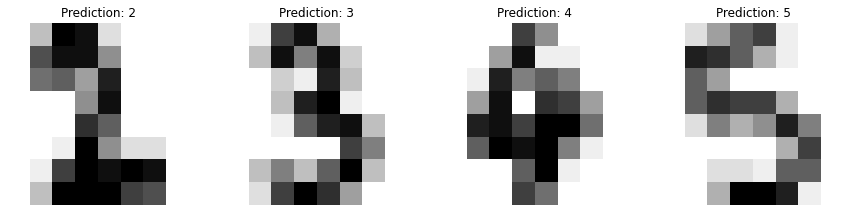

In [22]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,10))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    #print(image.shape)
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

#### classification_report builds a text report showing the main classification metrics :

In [24]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"


Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




#### A confusion matrix of the true digit values 

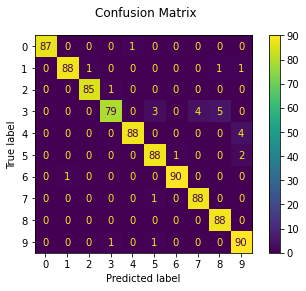

In [26]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")


plt.show()

In [ ]:
print(f"Confusion matrix:\n{disp.confusion_matrix}")

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]
